In [5]:
import nltk
import numpy as np
import pandas as pd
dataset= pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)
dataset.columns = ['label','body_text']
dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [11]:
dataset['body_text'][0]


"I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."

In [12]:
dataset['body_text'][1]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [14]:
#shape of the data
print('Input has {} rows and {} columns'.format(len(dataset),len(dataset.columns)))

Input has 5568 rows and 2 columns


In [15]:
#Number of spam/ham present
print('Out of {} rows {} are spam and {} are ham'.format(len(dataset),len(dataset[dataset['label']=='spam']),len(dataset[dataset['label']=='ham'])))

Out of 5568 rows 746 are spam and 4822 are ham


In [18]:
#Missing data
print('Number of null in label: {}'.format(dataset['label'].isnull().sum()))
print('Number of null in text: {}'.format(dataset['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


In [19]:
#Preprocessing Data
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
#Removing punctuation
def remove_punc(text):
    text_nopunc = "".join([char for char in text if char not in string.punctuation ])
    return text_nopunc

dataset['body_text_clean'] = dataset['body_text'].apply(lambda x : remove_punc(x))
dataset.head()


,label,body_text,body_text_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [46]:
#Tokenisation
import re
def tokenize(text):
    tokens = re.split('\W',text)
    return tokens

dataset['body_text_tokenized'] = dataset['body_text'].apply(lambda x:tokenize(x.lower()))


#Removing Stopwords
stopwords= nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text
dataset['body_text_nostop']=dataset['body_text_tokenized'].apply(lambda x:remove_stopwords(x))


#Stemming
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

dataset['body_text_stemmed'] = dataset['body_text_nostop'].apply(lambda x : stemming(x))


#Lemmatization
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
def lemmatize(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

dataset['body_text_lemmatized'] = dataset['body_text_nostop'].apply(lambda x : lemmatize(x))
dataset.head()

<>:4: SyntaxWarning: invalid escape sequence '\W'
<>:4: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Lohitaksha\AppData\Local\Temp\ipykernel_21360\3449711329.py:4: SyntaxWarning: invalid escape sequence '\W'
  tokens = re.split('\W',text)
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lohitaksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[i, ve, been, searching, for, the, right, word...","[searching, right, words, thank, breather, , p...","[search, right, word, thank, breather, , promi...","[searching, right, word, thank, breather, , pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, don, t, think, he, goes, to, usf, , h...","[nah, think, goes, usf, , lives, around, though]","[nah, think, goe, usf, , live, around, though]","[nah, think, go, usf, , life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, , treat, like, ai...","[even, brother, like, speak, , treat, like, ai...","[even, brother, like, speak, , treat, like, ai..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will, , ]","[date, sunday, , ]","[date, sunday, , ]","[date, sunday, , ]"


In [16]:
#Countvectorization
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import re
stopwords= nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
def clean_text(text):
    #remove punctuation
    text = "".join([char for char in text if char not in string.punctuation ])
    #tokenize
    tokens = re.split('\W',text)
    #stemming
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

count_vect = CountVectorizer(analyzer = clean_text)
X_count=count_vect.fit_transform(dataset['body_text'])
print(X_count.shape)


    


<>:11: SyntaxWarning: invalid escape sequence '\W'
<>:11: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Lohitaksha\AppData\Local\Temp\ipykernel_15704\2722709071.py:11: SyntaxWarning: invalid escape sequence '\W'
  tokens = re.split('\W',text)


(5568, 8191)


In [21]:
#For a small set
import nltk
import numpy as np
import pandas as pd
dataset= pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)
dataset.columns = ['label','body_text']

data_sample = dataset[0:20]
count_vect_sample = CountVectorizer(analyzer = clean_text)
X_count_sample = count_vect_sample.fit_transform(data_sample['body_text'])
print(X_count_sample.shape)


(20, 221)


In [24]:
X_count_sample
x_counts_df = pd.DataFrame(X_count_sample.toarray())
x_counts_df

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
import warnings
warnings.filterwarnings("ignore")
x_counts_df.columns = count_vect_sample.get_feature_names_out()
x_counts_df

,,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,...,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#TD-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(dataset['body_text'])
print(X_tfidf.shape)


(5568, 8191)


In [41]:
#To smaller sample
tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['body_text'])
print(X_tfidf_sample.shape)

(20, 221)


In [43]:
x_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
x_tfidf_df.columns = tfidf_vect_sample.get_feature_names_out()
x_tfidf_df

,,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,...,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,ü
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.230352,0.230352,0.202483,0.000000,0.000000,0.000000,0.000000,0.202483,0.000000
1,0.000000,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.173871,0.000000,0.000000,0.219209,0.000000,0.000000,0.000000,0.000000,0.219209,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.190382,0.000000,0.000000,0.000000,0.000000,0.000000,0.190382,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.219424,0.000000,0.000000,0.000000,0.219424,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
#Feature Engineering 
import string
import numpy as np
import pandas as pd
dataset= pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)
dataset.columns = ['label','body_text']
dataset.head()
dataset['body_len'] = dataset['body_text'].apply(lambda x : len(x) - x.count(" "))
def count_punc(text):
    count = sum([1 for char in text if char in string.punctuation]) 
    return round(count/(len(text) - text.count(" ")),3)*100

dataset['punc%'] = dataset['body_text'].apply(lambda x : count_punc(x))
dataset.head()



,label,body_text,body_len,punc%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


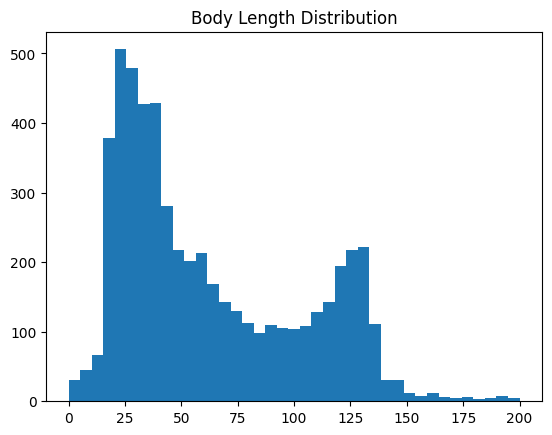

In [8]:
#Plotting distribution of length 
import matplotlib.pyplot as plt
bins=np.linspace(0,200,40)
plt.hist(dataset['body_len'],bins)
plt.title('Body Length Distribution')
plt.show()

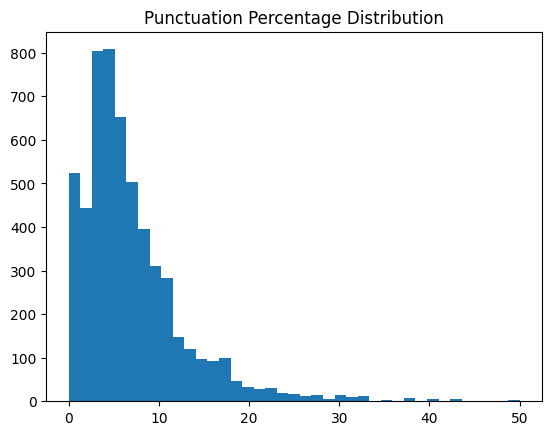

In [10]:
#Plotting distribution of punctuation percentage
bins=np.linspace(0,50,40)
plt.hist(dataset['punc%'],bins)
plt.title('Punctuation Percentage Distribution')
plt.show()

In [15]:
#Building classifiers using Random Forest Classification
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string
stopwords= nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
#clean text
def clean_text(text):
    #remove punctuation
    text = "".join([char for char in text if char not in string.punctuation ])
    #tokenize
    tokens = re.split('\W',text)
    #stemming
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf=tfidf_vect.fit_transform(dataset['body_text'])
X_features = pd.concat([dataset['body_len'], dataset['punc%'], pd.DataFrame(X_tfidf.toarray())],axis = 1)
X_features.head()


<>:14: SyntaxWarning: invalid escape sequence '\W'
<>:14: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Lohitaksha\AppData\Local\Temp\ipykernel_19952\959668284.py:14: SyntaxWarning: invalid escape sequence '\W'
  tokens = re.split('\W',text)


,body_len,punc%,0,1,2,3,4,5,6,7,...,8181,8182,8183,8184,8185,8186,8187,8188,8189,8190
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#Model using K-Fold cross-validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
rf=RandomForestClassifier(n_jobs=1)
k_fold=KFold(n_splits=5)
X_features.columns = X_features.columns.astype(str)
cross_val_score(rf, X_features, dataset['label'], cv=k_fold, scoring='accuracy', n_jobs=1)

array([0.97576302, 0.97935368, 0.97396768, 0.96675651, 0.97394429])

In [30]:
#Model using Train Test split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, dataset['label'], test_size=0.3,random_state=0)
rf=RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=-1)
X_train.columns = X_train.columns.astype(str)
rf_model = rf.fit(X_train, y_train)
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)[0:10]

[(0.0377524759416798, '1819'),
 (0.036285130691311715, 'body_len'),
 (0.03183627001692554, '2048'),
 (0.029468218677878227, '3159'),
 (0.029361412964275586, '7422'),
 (0.028305701330718122, '4838'),
 (0.01961260463233058, '7248'),
 (0.018230460468809367, '5779'),
 (0.01648017021138042, '6807'),
 (0.01619850911749221, '6343')]

In [44]:
#Finding the accuracy of the model in percent
X_test.columns = X_test.columns.astype(str)
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision {} / Recall {} / Accuracy {}%'.format(round(precision,3), round(recall,3),round((y_pred==y_test).sum()*100/len(y_pred),3)))

Precision 1.0 / Recall 0.58 / Accuracy 93.896%
